## Exercise 4 Neural Network Learning
### =========== Part 1: Loading and Visualizing Data =============

Loading and Visualizing Data ...
[10 10 10 10 10 10 10 10 10 10]


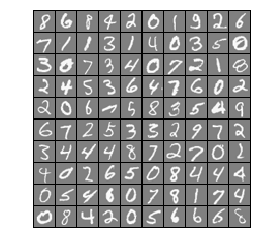

In [1]:
## Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10   
                         # (note that we have mapped "0" to label 10)
# Load Training Data
print('Loading and Visualizing Data ...')

from ex4 import *
from scipy import io as sio
data = sio.loadmat('ex4data1.mat')
X = data['X']
y = data['y'].reshape(-1)
m = X.shape[0]
print(y[:10])


# Randomly select 100 data points to display
sel = np.random.permutation(m)
sel = sel[:100]

%matplotlib inline
_ = displayData(X[sel, :])

### ================ Part 2: Loading Parameters ================

In [2]:
print('Loading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
data = sio.loadmat('ex4weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']
print(Theta1.shape, Theta2.shape)

# Unroll parameters 
nn_params = np.concatenate([Theta1.reshape(-1), Theta2.reshape(-1)])
print(nn_params.shape)

Loading Saved Neural Network Parameters ...
(25, 401) (10, 26)
(10285,)


### ================ Part 3: Compute Cost (Feedforward) ================
代价函数$$J(\theta) = -\frac{1}{m}\left[\sum_{i=1}^{m}\sum_{k=1}^{K}{y_k^{(i)}\log\left(h_\Theta(x^{(i)})_k\right) + (1 - y_k^{(i)})\log\left(1 - h_\Theta(x^{(i)})_k\right)}\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}}{\left(\Theta_{ji}^{(l)}\right)^2} = -\frac{1}{m}trace\left(y^T\log\left(h_\Theta(X)\right) + ({\bf1} - y)^T\log\left({\bf1} - h_\Theta(X)\right)\right) + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}}{\left(\Theta_{ji}^{(l)}\right)^2}$$

In [3]:
print('Feedforward Using Neural Network ...')

# Weight regularization parameter (we set this to 0 here).
lambda_ = 0

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

print(f'Cost at parameters (loaded from ex4weights): {J:f} \n(this value should be about 0.287629)')

Feedforward Using Neural Network ...
Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)


### =============== Part 4: Implement Regularization ===============

In [4]:
print('Checking Cost Function (w/ Regularization) ... ')

# Weight regularization parameter (we set this to 1 here).
lambda_ = 1

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

print(f'Cost at parameters (loaded from ex4weights): {J:f} \n(this value should be about 0.383770)')

Checking Cost Function (w/ Regularization) ... 
Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)


### ================ Part 5: Sigmoid Gradient  ================
$$sigmoid(z) = g(z) = \frac{1}{1 + e^{-z}}$$
$$g'(z) = \frac{d}{dz}g(z) = g(z)\left(1 - g(z)\right)$$

In [5]:
print('Evaluating sigmoid gradient...')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]))
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:  ')
print(f'{g}')

Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:  
[0.196612 0.235004 0.25     0.235004 0.196612]


### ================ Part 6: Initializing Pameters ================
$$\epsilon_{init} = \frac{\sqrt{6}}{\sqrt{L_{in} + L_{out}}}$$

In [6]:
print('Initializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.concatenate([initial_Theta1.reshape(-1), initial_Theta2.reshape(-1)])
print(initial_nn_params[:5])

Initializing Neural Network Parameters ...
[ 0.066709  0.088432  0.010104 -0.059409 -0.01829 ]


### =============== Part 7: Implement Backpropagation ===============
梯度计算$$\Delta_{ij}^{(l)} = \sum_m{a_j^{(l)}\delta_i^{(l+1)}}$$
$$D^{(l)} = \frac{1}{m}\Delta^{(l)} + \frac{\lambda}{m}\Theta^{(l)}$$

In [7]:
print('Checking Backpropagation... ')

#  Check gradients by running checkNNGradients
checkNNGradients()

Checking Backpropagation... 
[[ 1.231622e-02  1.231622e-02]
 [ 1.738282e-04  1.738282e-04]
 [ 2.614551e-04  2.614551e-04]
 [ 1.087014e-04  1.087015e-04]
 [ 3.924714e-03  3.924714e-03]
 [ 1.901013e-04  1.901013e-04]
 [ 2.222723e-04  2.222723e-04]
 [ 5.008725e-05  5.008725e-05]
 [-8.084594e-03 -8.084594e-03]
 [ 3.131706e-05  3.131706e-05]
 [-2.178403e-05 -2.178403e-05]
 [-5.485698e-05 -5.485699e-05]
 [-1.266691e-02 -1.266691e-02]
 [-1.561302e-04 -1.561302e-04]
 [-2.455062e-04 -2.455062e-04]
 [-1.091649e-04 -1.091649e-04]
 [-5.593425e-03 -5.593425e-03]
 [-2.000366e-04 -2.000366e-04]
 [-2.436302e-04 -2.436302e-04]
 [-6.323137e-05 -6.323137e-05]
 [ 3.093477e-01  3.093477e-01]
 [ 1.610671e-01  1.610671e-01]
 [ 1.470365e-01  1.470365e-01]
 [ 1.582686e-01  1.582686e-01]
 [ 1.576167e-01  1.576167e-01]
 [ 1.472364e-01  1.472364e-01]
 [ 1.081330e-01  1.081330e-01]
 [ 5.616337e-02  5.616337e-02]
 [ 5.195105e-02  5.195105e-02]
 [ 5.473534e-02  5.473534e-02]
 [ 5.530828e-02  5.530828e-02]
 [ 5.17752

### =============== Part 8: Implement Regularization ===============

In [8]:
print('Checking Backpropagation (w/ Regularization) ... ')

#  Check gradients by running checkNNGradients
lambda_ = 3
checkNNGradients(lambda_)

# Also output the costFunction debugging values
debug_J, _  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

print(f'\nCost at (fixed) debugging parameters (w/ lambda = {lambda_:f}): {debug_J:f} '
         '\n(for lambda = 3, this value should be about 0.576051)')

Checking Backpropagation (w/ Regularization) ... 
[[ 0.012316  0.012316]
 [ 0.054732  0.054732]
 [ 0.008729  0.008729]
 [-0.045299 -0.045299]
 [ 0.003925  0.003925]
 [-0.016575 -0.016575]
 [ 0.039641  0.039641]
 [ 0.059412  0.059412]
 [-0.008085 -0.008085]
 [-0.03261  -0.03261 ]
 [-0.060021 -0.060021]
 [-0.032249 -0.032249]
 [-0.012667 -0.012667]
 [ 0.05928   0.05928 ]
 [ 0.038772  0.038772]
 [-0.017383 -0.017383]
 [-0.005593 -0.005593]
 [-0.045259 -0.045259]
 [ 0.008749  0.008749]
 [ 0.054713  0.054713]
 [ 0.309348  0.309348]
 [ 0.215625  0.215625]
 [ 0.155504  0.155504]
 [ 0.11286   0.11286 ]
 [ 0.100081  0.100081]
 [ 0.130471  0.130471]
 [ 0.108133  0.108133]
 [ 0.115525  0.115525]
 [ 0.076678  0.076678]
 [ 0.022094  0.022094]
 [-0.004691 -0.004691]
 [ 0.019581  0.019581]
 [ 0.10627   0.10627 ]
 [ 0.115198  0.115198]
 [ 0.089574  0.089574]
 [ 0.036606  0.036606]
 [-0.002943 -0.002943]
 [ 0.005234  0.005234]]
The above two columns you get should be very similar.
(Left-Your Numerical 

### =================== Part 8: Training NN ===================

In [9]:
print('Training Neural Network... ')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
options = {'maxiter': 400}

#  You should also try different values of lambda
lambda_ = 1;

# Create "short hand" for the cost function to be minimized
fun = lambda nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_:\
    nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)[0]
jac = lambda nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_:\
    nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)[1]

# Now, costFunction is a function that takes in only one argument (the
# neural network parameters)
from scipy import optimize as opt
res = opt.minimize(fun, initial_nn_params, args=(input_layer_size, hidden_layer_size, num_labels, X, y, lambda_),
                   method='CG', jac=jac, options=options)
nn_params = res.x
cost = res.fun

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape((hidden_layer_size, input_layer_size + 1))
Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape((num_labels, hidden_layer_size + 1))

Training Neural Network... 


### ================= Part 9: Visualize Weights =================

Visualizing Neural Network... 


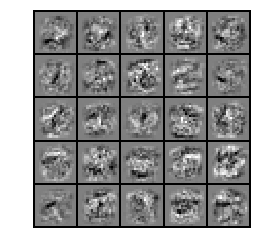

In [10]:
print('Visualizing Neural Network... ')

_ = displayData(Theta1[:, 1:])

### ================= Part 10: Implement Predict =================

In [11]:
pred = predict(Theta1, Theta2, X)

print(f'Training Set Accuracy: {(pred == y).mean() * 100:f}')

Training Set Accuracy: 99.480000


###### 以上部分代码在[ex4.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex4/ex4.py)中

### 总结：神经网络计算比较准确，但是好慢= =，还有可能是过拟合了。学习了反向传播的代码实现。